# SzCzGiE-labs

### Part I

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from math import log10, log2, log
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
# loading data from csv
data = pd.read_csv('IBM.csv', parse_dates=['Date'])
N = len(data.index)
close = pd.Series(data['Close'], name='RawPrice')
dates = pd.Series(data['Date'], name='Date')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,7.713333,7.713333,7.626667,7.626667,1.858243,390000
1,1962-01-03,7.626667,7.693333,7.626667,7.693333,1.874485,292500
2,1962-01-04,7.693333,7.693333,7.613333,7.616667,1.855805,262500
3,1962-01-05,7.606667,7.606667,7.453333,7.466667,1.819257,367500
4,1962-01-08,7.460000,7.460000,7.266667,7.326667,1.785148,547500


In [4]:
# separation of close price data
close = pd.DataFrame({'Date':data['Date'], 'RawPrice':data['Close']})
close.set_index('Date')
pass

<AxesSubplot:title={'center':'ClosePrice'}, xlabel='Date'>

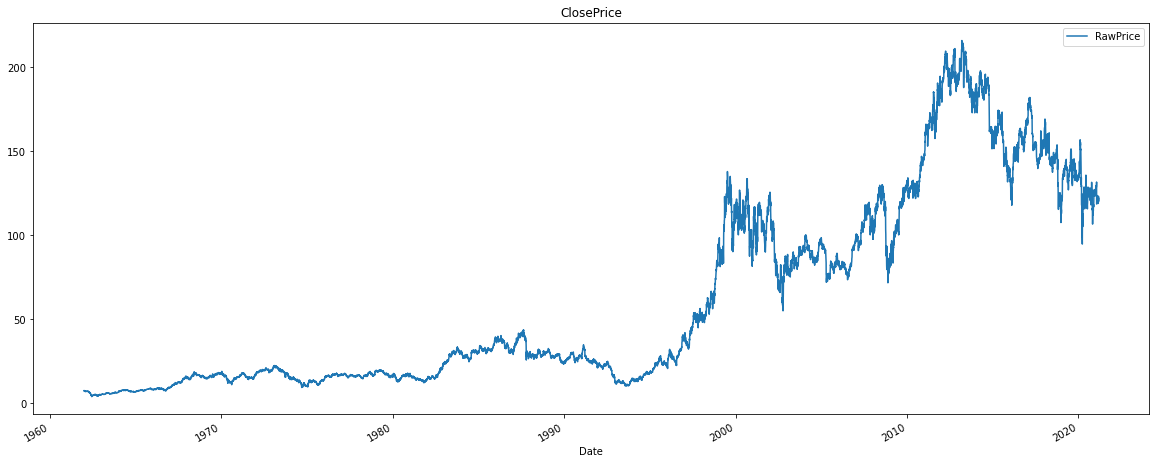

In [5]:
close.plot(figsize=(20,8), x='Date', y='RawPrice', title='ClosePrice')

<AxesSubplot:title={'center':'log(ClosePrice)'}, xlabel='Date'>

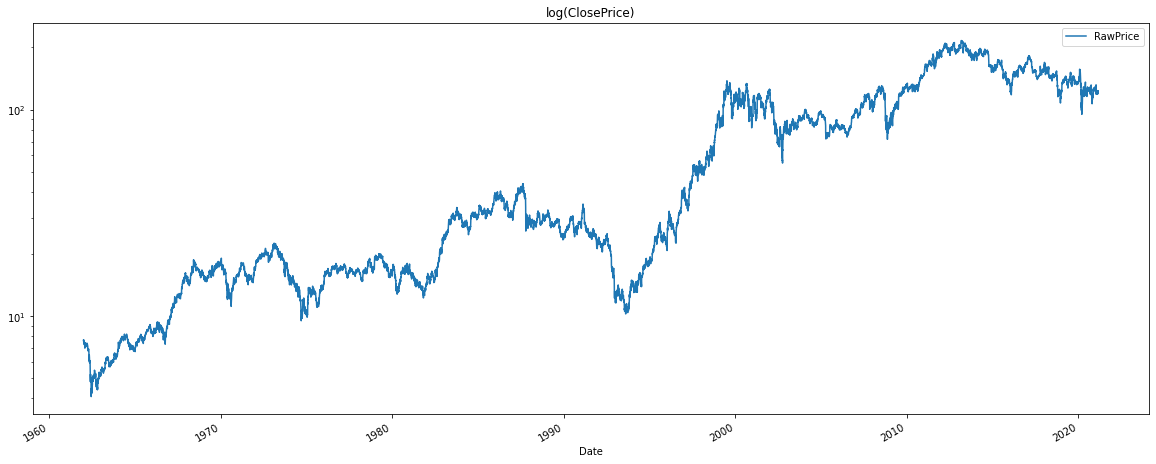

In [6]:
close.plot(figsize=(20,8), x='Date', y='RawPrice', logy=True, title='log(ClosePrice)')

In [7]:
# logarithmic rates of return for close prices
close['LogReturnRates'] = pd.Series(np.array([0.0] + [log(close['RawPrice'][i]/close['RawPrice'][i-1]) for i in range(1, len(close['RawPrice']))]))

<AxesSubplot:title={'center':'LogReturnRates'}, xlabel='Date'>

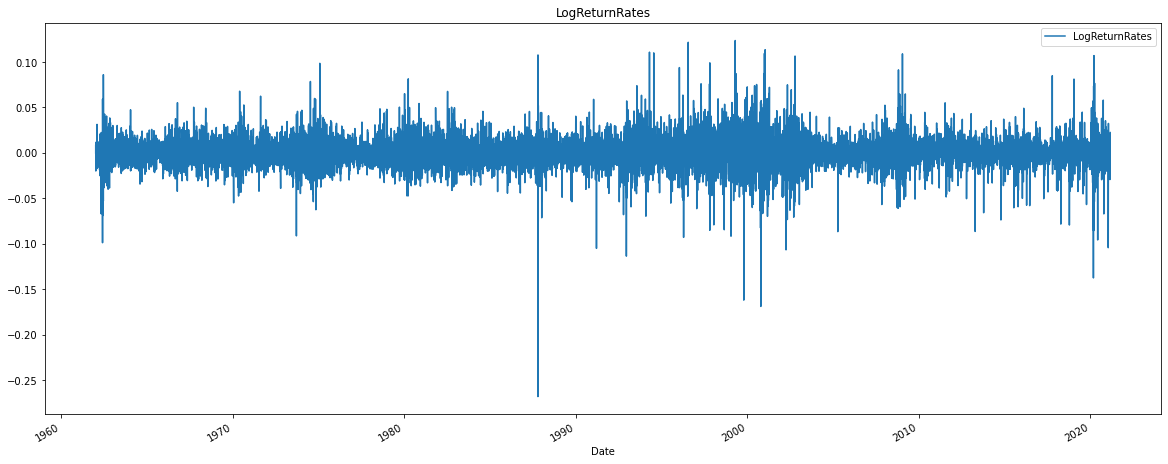

In [8]:
close.plot(figsize=(20,8), x='Date', y='LogReturnRates', title='LogReturnRates')

In [9]:
# standarized logarithimc rates of return for close prices (using z-score: std=1, mean=0)
close['StandarizedLogReturnRates']= (close['LogReturnRates'] - close['LogReturnRates'].mean()) / close['LogReturnRates'].std()
close.head()

,Date,RawPrice,LogReturnRates,StandarizedLogReturnRates
0,1962-01-02,7.626667,0.000000,-0.011651
1,1962-01-03,7.693333,0.008703,0.531862
2,1962-01-04,7.616667,-0.010015,-0.637102
3,1962-01-05,7.466667,-0.019890,-1.253790
4,1962-01-08,7.326667,-0.018928,-1.193704


<AxesSubplot:title={'center':'StandarizedLogReturnRates'}, xlabel='Date'>

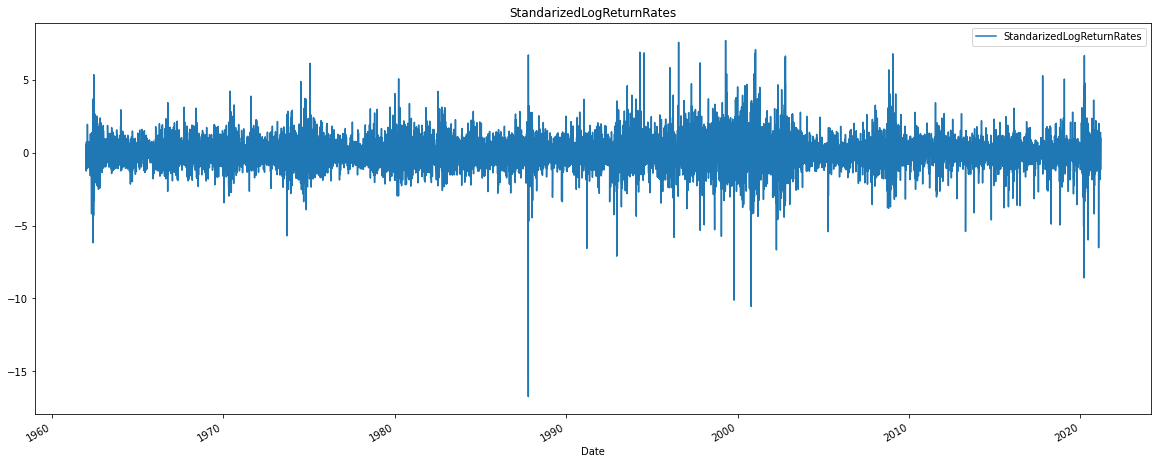

In [10]:
close.plot(figsize=(20,8), x='Date', y='StandarizedLogReturnRates', title='StandarizedLogReturnRates')

### Part II

In [11]:
# white noise
mean = 0
std = 1
N = len(data['Close'])
white_noise = pd.DataFrame(data=np.random.normal(mean, std, size=N), columns=['StandarizedWhiteNoise'], index=data['Date'])

<AxesSubplot:title={'center':'StandarizedWhiteNoise'}, xlabel='Date'>

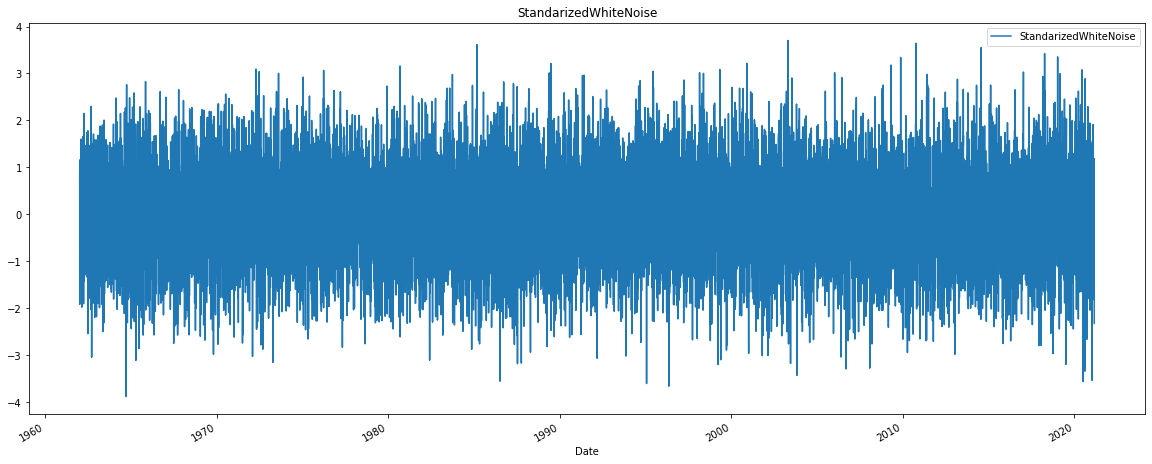

In [12]:
white_noise.plot(figsize=(20,8), y='StandarizedWhiteNoise', title='StandarizedWhiteNoise')

In [13]:
# white noise cumulative sum
white_noise['CumulativeSum'] = white_noise.cumsum()
white_noise.head()

,StandarizedWhiteNoise,CumulativeSum
Date,,
1962-01-02,0.922626,0.922626
1962-01-03,-1.914407,-0.991781
1962-01-04,1.156987,0.165206
1962-01-05,1.158831,1.324037
1962-01-08,-0.470362,0.853674


<AxesSubplot:title={'center':'CumulativeSum(WhiteNoise) - Brownian motion'}, xlabel='Date'>

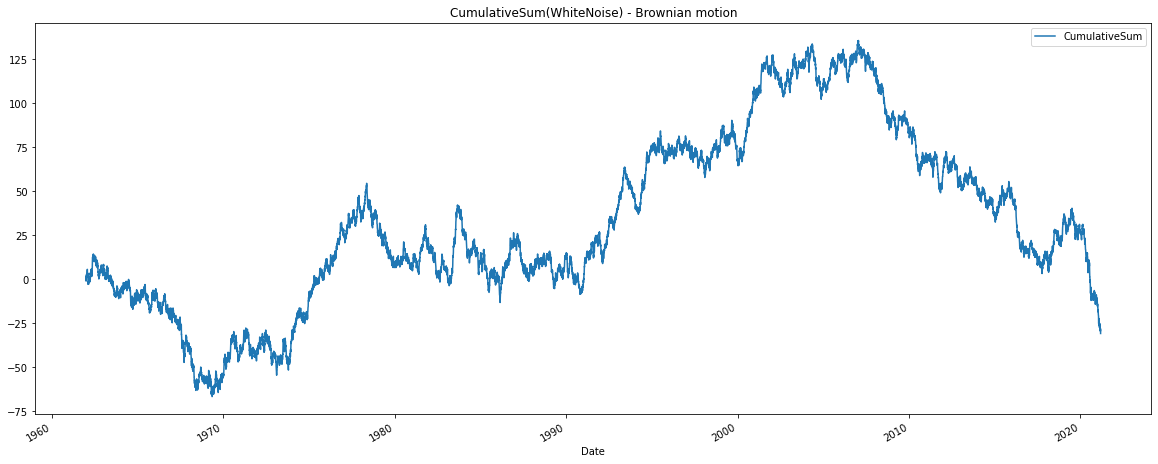

In [14]:
white_noise.plot(figsize=(20,8), y='CumulativeSum', title='CumulativeSum(WhiteNoise) - Brownian motion')

<AxesSubplot:title={'center':'Standarided LogReturnRatesOfClosePrice & StandarizedCumulativeSumOfWhiteNoise'}, xlabel='Date'>

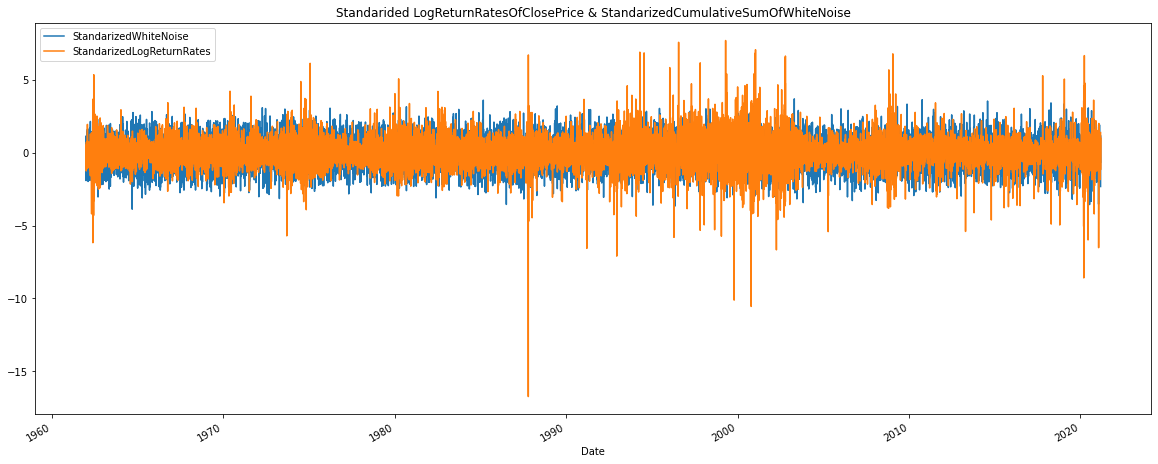

In [15]:
ax = white_noise.plot(y='StandarizedWhiteNoise')
close.plot(figsize=(20,8), x='Date', y='StandarizedLogReturnRates', ax=ax, title='Standarided LogReturnRatesOfClosePrice & StandarizedCumulativeSumOfWhiteNoise', legend=True)

### Part III

Histograms

array([[<AxesSubplot:title={'center':'StandarizedLogReturnRates'}>]],
      dtype=object)

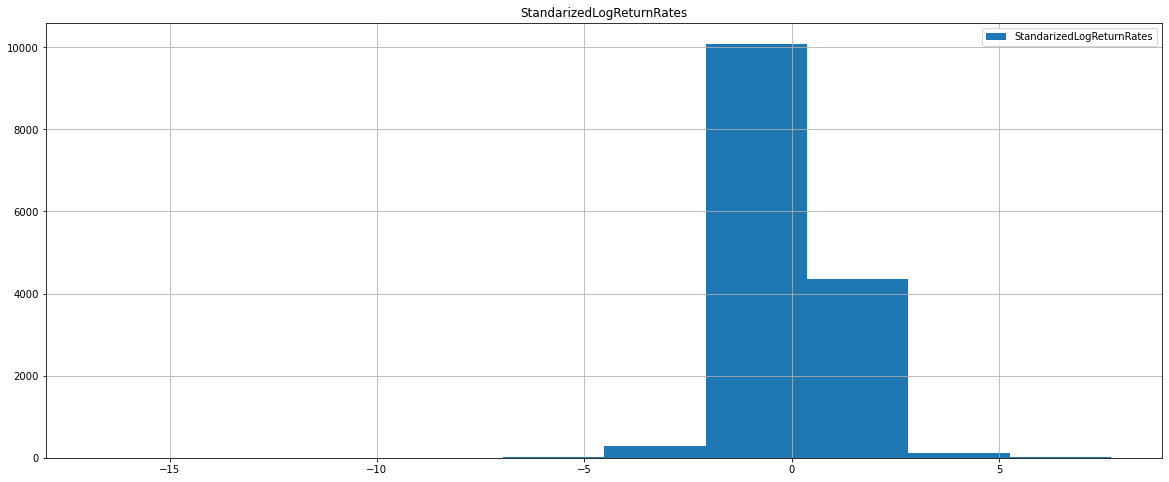

In [16]:
# standarized Log Return Rates of Close prices histogram
close.hist(figsize=(20,8), column=['StandarizedLogReturnRates'], legend=True)

array([[<AxesSubplot:title={'center':'StandarizedWhiteNoise'}>]],
      dtype=object)

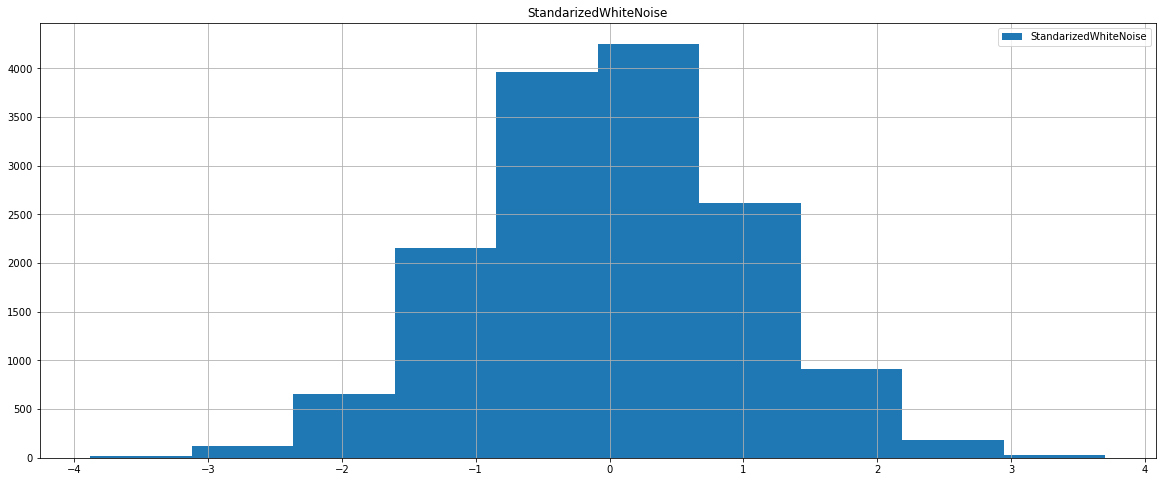

In [17]:
# standarized White noise histogram
white_noise.hist(figsize=(20,8), column=['StandarizedWhiteNoise'], legend=True)

array([[<AxesSubplot:title={'center':'CumulativeSum'}>]], dtype=object)

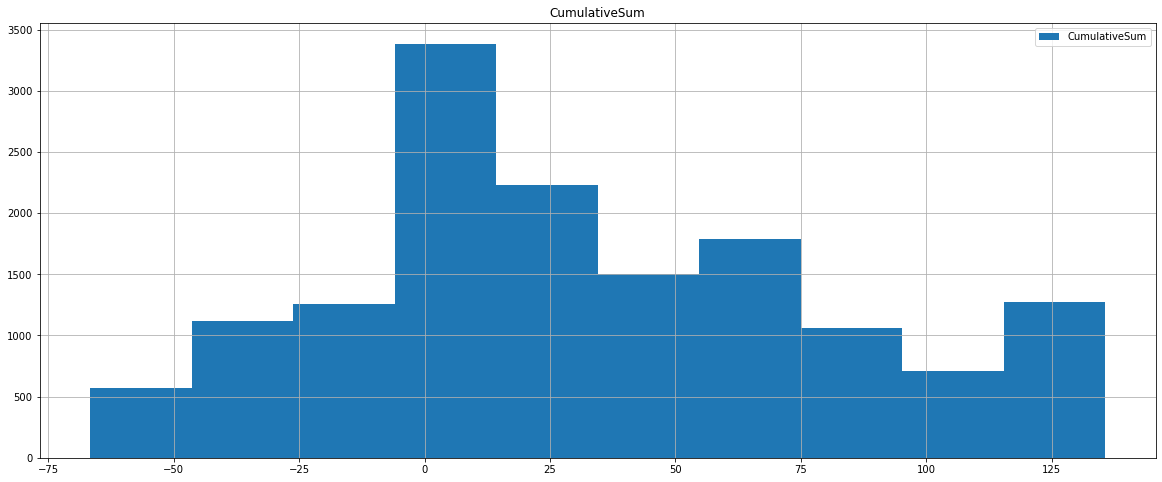

In [18]:
# standarized White noise CumulativeSum histogram
white_noise.hist(figsize=(20,8), column=['CumulativeSum'], legend=True)

array([[<AxesSubplot:title={'center':'StandarizedLogReturnRates'}>]],
      dtype=object)

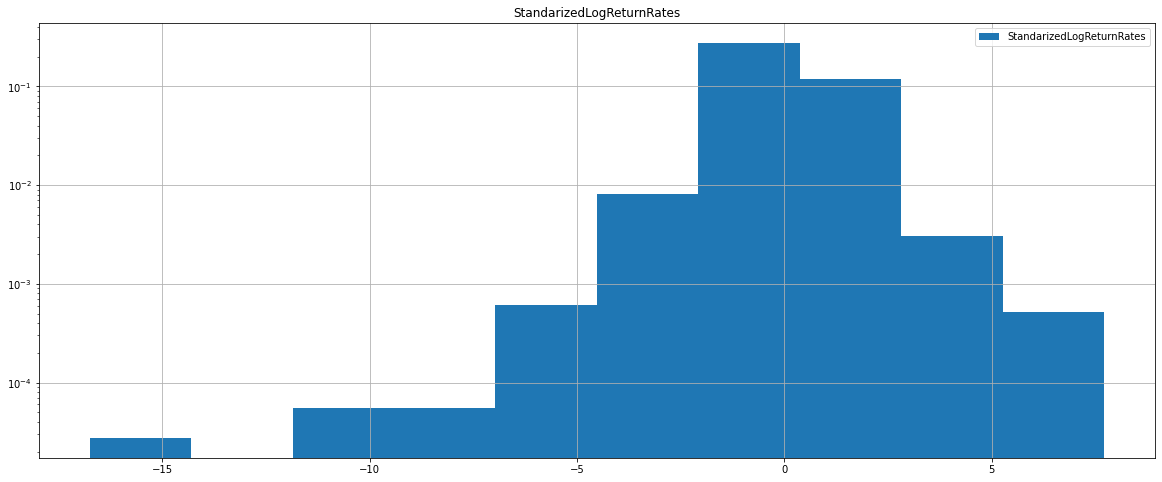

In [19]:
# Standarized Close LogReturnRates histogram as percentages (log scale)
close.hist(figsize=(20,8), column=['StandarizedLogReturnRates'], log=True, density=True, legend=True)

array([[<AxesSubplot:title={'center':'CumulativeSum'}>]], dtype=object)

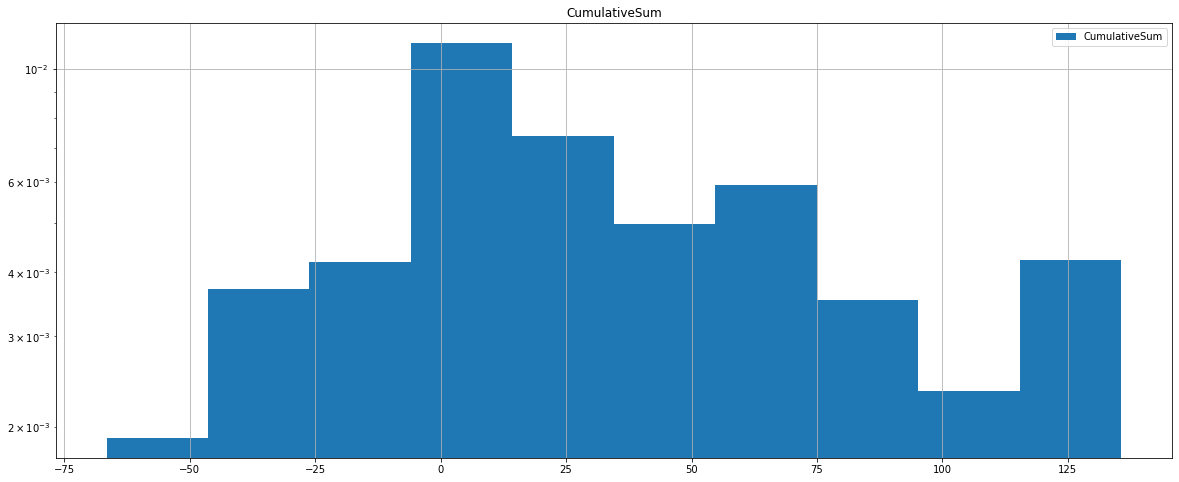

In [20]:
# Standarized White noise Cumulative Sums histogram as percentages (log scale)
white_noise.hist(figsize=(20,8), column=['CumulativeSum'], log=True, density=True, legend=True)

Distribution parameters

In [21]:
# close prices kurtosis
close.kurt(axis=0)

RawPrice                     -0.485366
LogReturnRates               12.239468
StandarizedLogReturnRates    12.239468
dtype: float64

In [22]:
# close prices skeweness
close.skew(axis=0)

RawPrice                     0.924353
LogReturnRates              -0.342694
StandarizedLogReturnRates   -0.342694
dtype: float64

In [23]:
# white noise kurtosis
white_noise.kurt(axis=0)

StandarizedWhiteNoise    0.021286
CumulativeSum           -0.695905
dtype: float64

In [24]:
# white noise skeweness
white_noise.skew(axis=0)

StandarizedWhiteNoise   -0.025810
CumulativeSum            0.275544
dtype: float64

Cumulative Distribution Function for both series (close data and white noises)

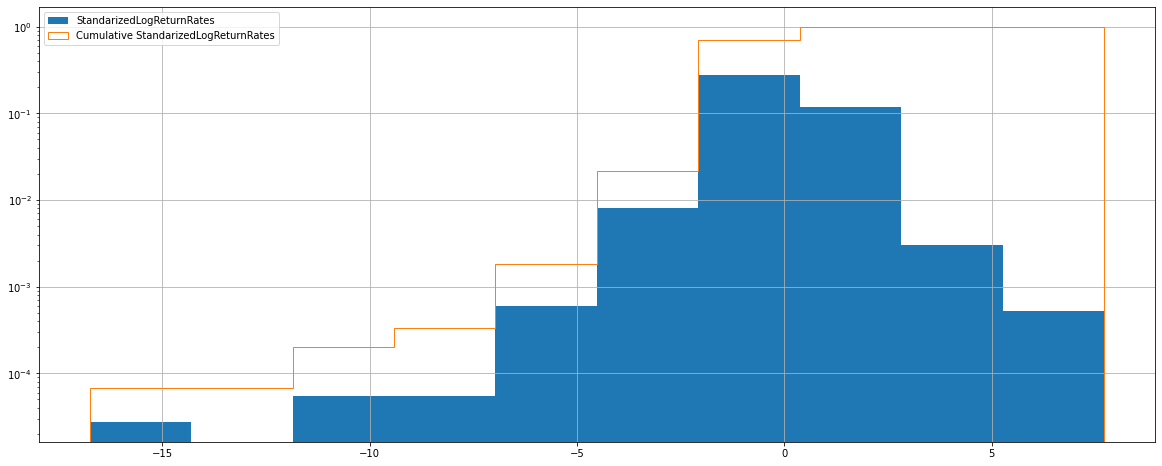

In [25]:
# Standarized Close LogReturnRates histograms as percentages (log scale)
plt.figure(figsize=(20,8))
plt.grid(True)
plt.hist(close['StandarizedLogReturnRates'], log=True, density=True, label="StandarizedLogReturnRates")
plt.hist(close['StandarizedLogReturnRates'], log=True, density=True, cumulative=1, histtype='step', label="Cumulative StandarizedLogReturnRates")
plt.legend(loc='upper left')

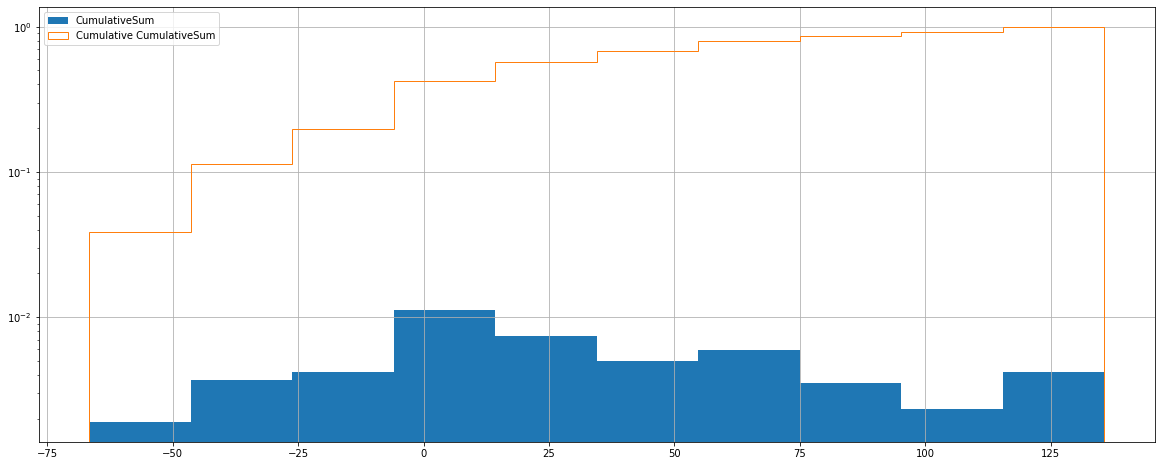

In [26]:
# Standarized CumulativeSum of White Noise histograms as percentages (log scale)
plt.figure(figsize=(20,8))
plt.grid(True)
plt.hist(white_noise['CumulativeSum'], log=True, density=True, label="CumulativeSum")
plt.hist(white_noise['CumulativeSum'], cumulative=1, histtype='step', log=True, density=True, label="Cumulative CumulativeSum")
plt.legend(loc='upper left')

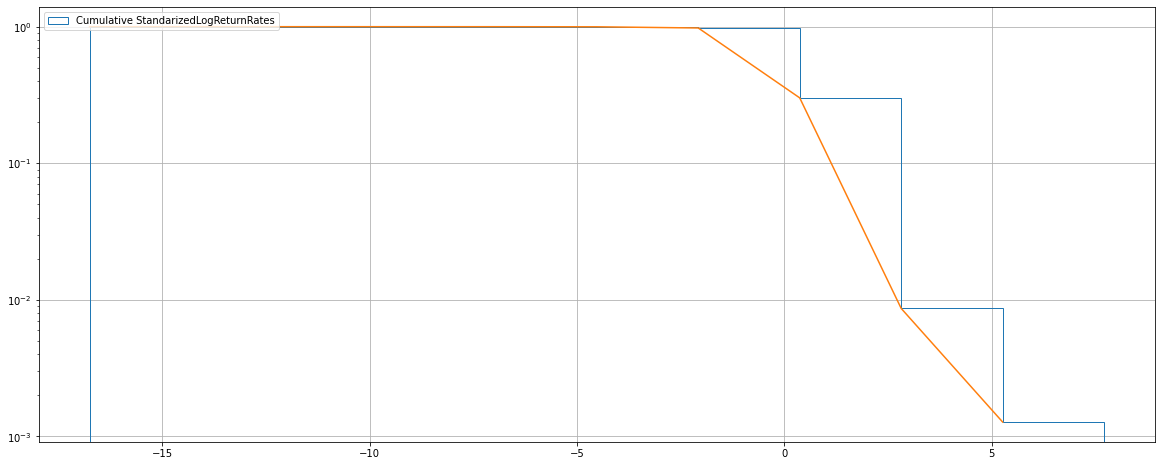

In [27]:
# Standarized CumulativeSum of StandarizedLogReturnRates histograms as percentages (log scale)
plt.figure(figsize=(20,8))
plt.grid(True)

counts, bins, bars = plt.hist(close['StandarizedLogReturnRates'], cumulative=-1, histtype='step', log=True, density=True, label="Cumulative StandarizedLogReturnRates")
plt.plot(bins[:-1], counts)
    
plt.legend(loc='upper left')

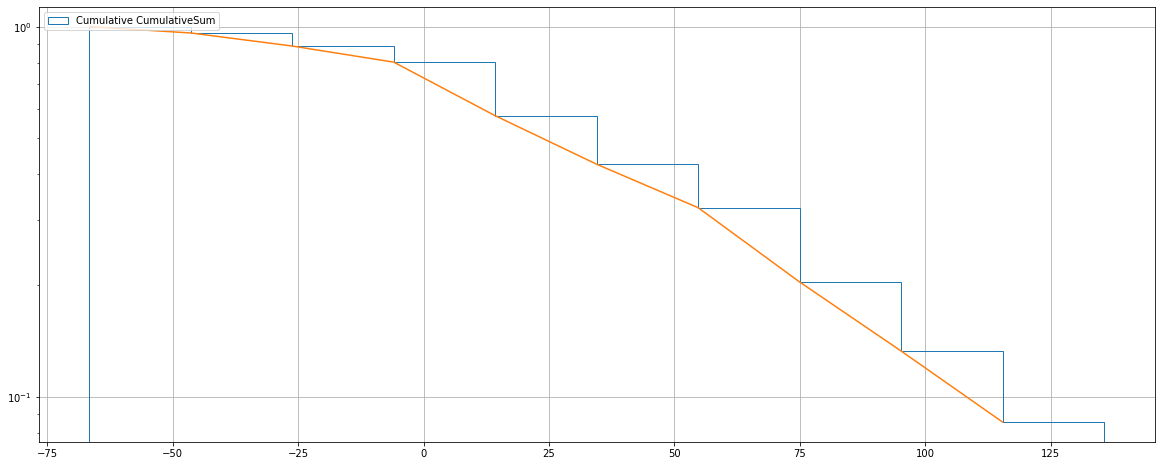

In [28]:
# Standarized CumulativeSum of White Noise histograms as percentages (log scale)
plt.figure(figsize=(20,8))
plt.grid(True)
# plt.hist(white_noise['CumulativeSum'], log=True, density=True, label="CumulativeSum")
# counts, bins, bars = plt.hist(white_noise['CumulativeSum'], log=True, density=True, label="CumulativeSum")
# c = []
# for i in range(0, len(counts), 1):
#     counts[i] =  1-counts[i]
#     c.append(1-counts[i])

# counts #= c[::-1]
# plt.plot(bins[:-1], counts)

# plt.hist(white_noise['CumulativeSum'], cumulative=1, histtype='step', log=True, density=True, label="Cumulative CumulativeSum")
counts, bins, bars = plt.hist(white_noise['CumulativeSum'], cumulative=-1, histtype='step', log=True, density=True, label="Cumulative CumulativeSum")
# c = []
# cumSum =  sum(white_noise['CumulativeSum'])
# for i in range(0, len(counts), 1):
#     sumVal = counts[i] = 1-counts[i]
#     c.append(1-counts[i])

# counts = c[::-1]
plt.plot(bins[:-1], counts)
    
plt.legend(loc='upper left')

### Part IV

#### AUTOCORELATION

(-0.05, 0.05)

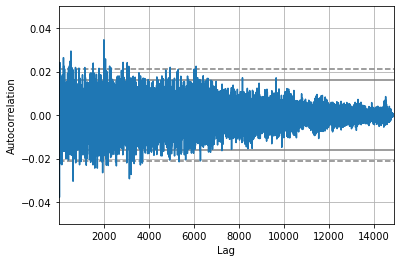

In [29]:
# autocorelation plot for standarized log return rates (dashed line - 99% confidence, solid line - 95% confidence)
ax = pd.plotting.autocorrelation_plot(close['StandarizedLogReturnRates'])
ax.set_ylim([-0.05, 0.05])

(-0.05, 0.05)

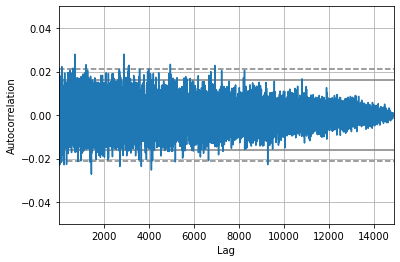

In [30]:
# autocorelation plot for standarized white noise (dashed line - 99% confidence, solid line - 95% confidence)
ax = pd.plotting.autocorrelation_plot(white_noise['StandarizedWhiteNoise'])
ax.set_ylim([-0.05, 0.05])

AUTOCORELATION FOR ABSOLUTE VALUES

(-0.1, 0.2)

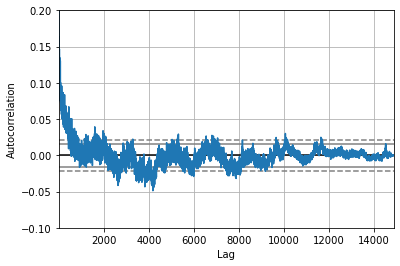

In [31]:
# autocorelation plot for absolute standarized log return rates (dashed line - 99% confidence, solid line - 95% confidence)
ax = pd.plotting.autocorrelation_plot(abs(close['StandarizedLogReturnRates']))
ax.set_ylim([-0.1, 0.2])

(-0.05, 0.05)

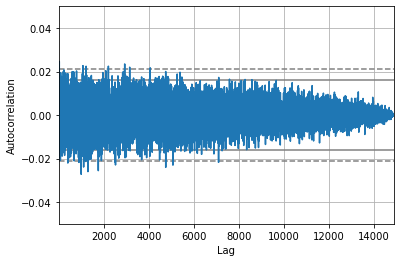

In [32]:
# autocorelation plot for absolute standarized white noise(dashed line - 99% confidence, solid line - 95% confidence)
ax = pd.plotting.autocorrelation_plot(abs(white_noise['StandarizedWhiteNoise']))
ax.set_ylim([-0.05, 0.05])

#### FAST FOURIER TRANSFORM

In [33]:
datetime_dates = pd.to_datetime(dates)
datetime_dates

0       1962-01-02
1       1962-01-03
2       1962-01-04
3       1962-01-05
4       1962-01-08
           ...    
14891   2021-03-01
14892   2021-03-02
14893   2021-03-03
14894   2021-03-04
14895   2021-03-05
Name: Date, Length: 14896, dtype: datetime64[ns]

Whitenoise

In [34]:
import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df_avg = white_noise['StandarizedWhiteNoise'].dropna().groupby('Date').mean()
df_avg.head()

Date
1962-01-02    0.922626
1962-01-03   -1.914407
1962-01-04    1.156987
1962-01-05    1.158831
1962-01-08   -0.470362
Name: StandarizedWhiteNoise, dtype: float64

Text(0, 0.5, 'StandarizedWhiteNoise')

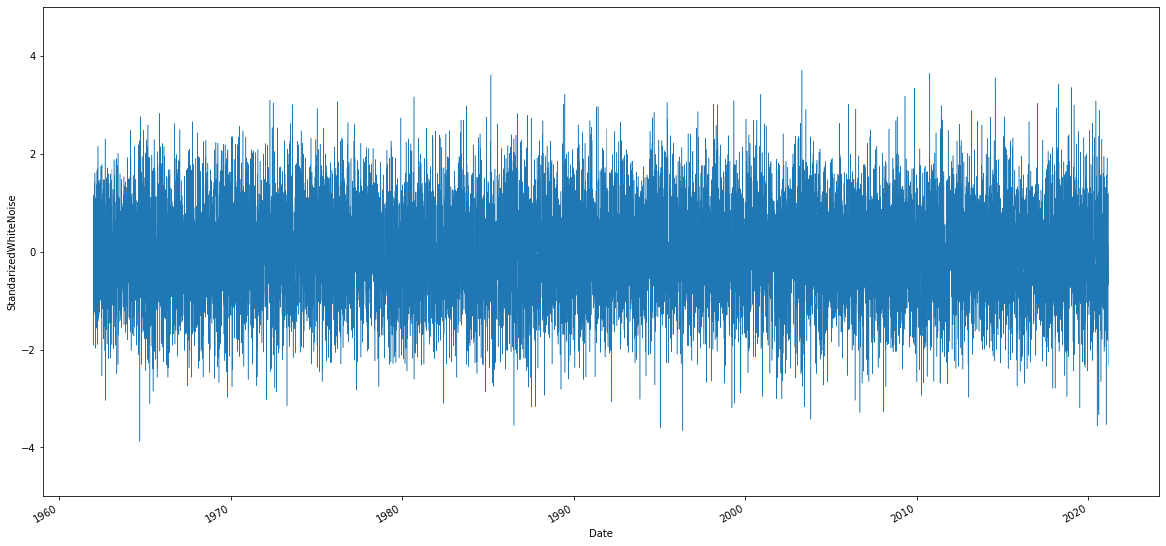

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
df_avg .plot(ax=ax, lw=.5)
ax.set_ylim(-5, 5)
ax.set_xlabel('Date')
ax.set_ylabel('StandarizedWhiteNoise')

In [37]:
# Fourier transform
white_noise_fft = sp.fftpack.fft(np.array(df_avg))
white_noise_fft

array([ -30.74628373  -0.j        , -208.73448358 -64.10543406j,
        -58.45127713-147.367031j  , ...,  -58.33734645-125.53616369j,
        -58.45127713+147.367031j  , -208.73448358 +64.10543406j])

In [38]:
# power of spectral density (PSD)
white_noise_psd = np.abs(white_noise_fft) ** 2
white_noise_psd

array([  945.33396317, 47679.5913105 , 25133.59362561, ...,
       19162.57438585, 25133.59362561, 47679.5913105 ])

In [39]:
white_noise_fftfreq = sp.fftpack.fftfreq(len(white_noise_psd), 1. / 365)
white_noise_fftfreq

array([ 0.        ,  0.02450322,  0.04900644, ..., -0.07350967,
       -0.04900644, -0.02450322])

Power spectral density of signal plot, as a function of the frequency (in unit of 1/year) in logarithmic scale for the y axis (decibels)

Text(0, 0.5, 'PSD (dB)')

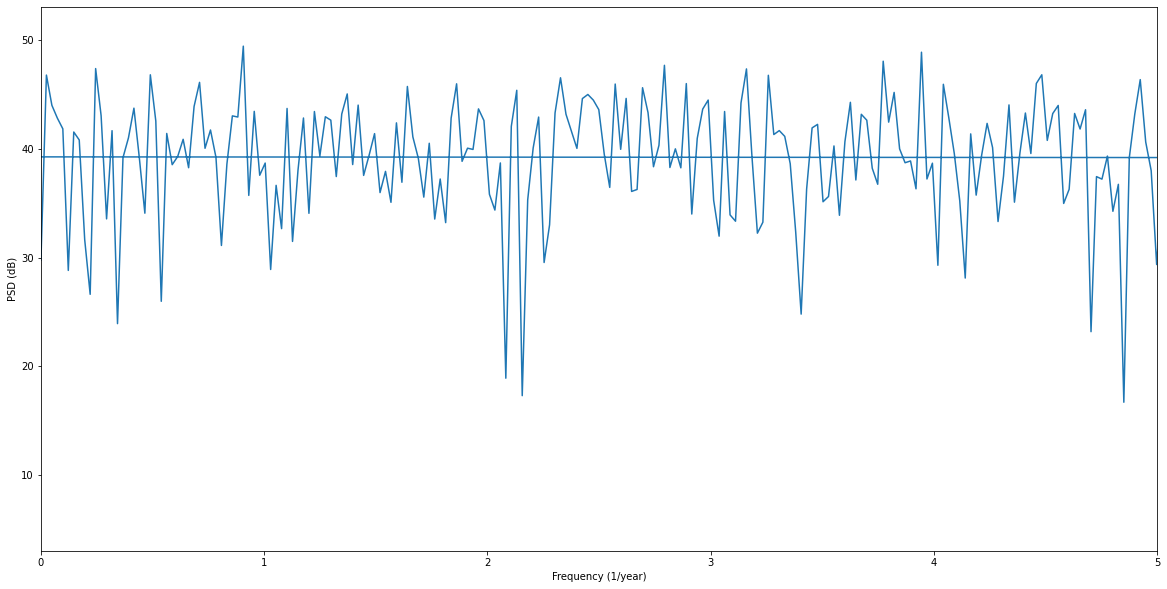

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(white_noise_fftfreq, 10 * np.log10(white_noise_psd))
ax.set_xlim(0, 5)
ax.set_xlabel('Frequency (1/year)')
ax.set_ylabel('PSD (dB)')

In [41]:
white_noise_fft_bis = white_noise_fft.copy()
white_noise_fft_bis[np.abs(white_noise_fftfreq) > 1.1] = 0
white_noise_fft_bis

array([ -30.74628373  -0.j        , -208.73448358 -64.10543406j,
        -58.45127713-147.367031j  , ...,  -58.33734645-125.53616369j,
        -58.45127713+147.367031j  , -208.73448358 +64.10543406j])

Text(0, 0.5, 'Mean temperature')

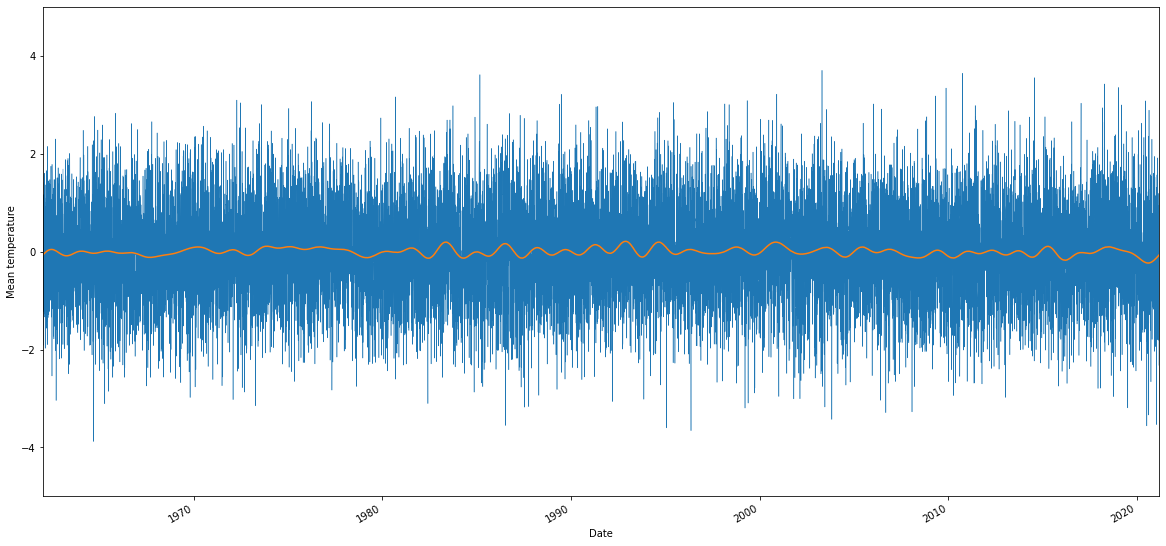

In [42]:
# Inverse FFT to convert the modified Fourier transform back to the temporal domain. 
# Recovered signal that mainly contains the fundamental frequency

white_noise_slow = np.real(sp.fftpack.ifft(white_noise_fft_bis))

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
df_avg.plot(ax=ax, lw=.5)
ax.plot_date(dates, white_noise_slow, '-')
ax.set_xlim(datetime_dates[0],
            datetime_dates[len(datetime_dates)-1])
ax.set_ylim(-5, 5)
ax.set_xlabel('Date')
ax.set_ylabel('Mean temperature')


Log Return Rates

In [43]:
df_avg = close.dropna().groupby('Date').mean()
df_avg.head()

,RawPrice,LogReturnRates,StandarizedLogReturnRates
Date,,,
1962-01-02,7.626667,0.000000,-0.011651
1962-01-03,7.693333,0.008703,0.531862
1962-01-04,7.616667,-0.010015,-0.637102
1962-01-05,7.466667,-0.019890,-1.253790
1962-01-08,7.326667,-0.018928,-1.193704


Text(0, 0.5, 'StandarizedLogReturnRates')

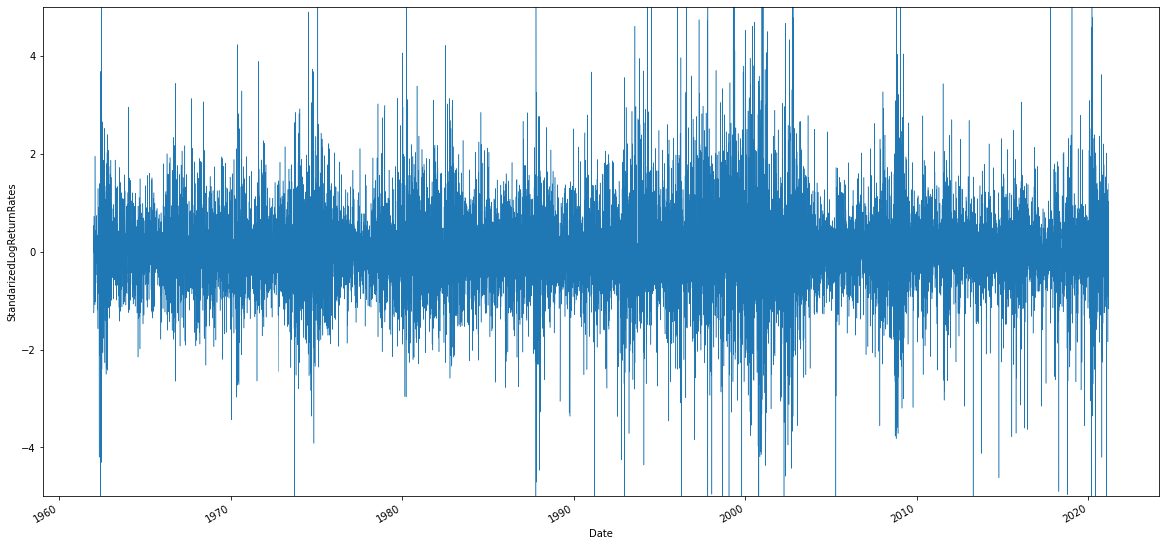

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
df_avg['StandarizedLogReturnRates'].plot(ax=ax, lw=.5)
ax.set_ylim(-5, 5)
ax.set_xlabel('Date')
ax.set_ylabel('StandarizedLogReturnRates')

In [45]:
# Fourier transform
stdLogRetRates_fft = sp.fftpack.fft(np.array(df_avg['StandarizedLogReturnRates']))
stdLogRetRates_fft

array([-2.70006240e-13 -0.j        , -4.18598582e+01+28.91432271j,
       -3.53338127e+01-90.30763192j, ...,  4.61605305e+01 +4.38298036j,
       -3.53338127e+01+90.30763192j, -4.18598582e+01-28.91432271j])

In [46]:
# power of spectral density (PSD)
stdLogRetRates_psd = np.abs(stdLogRetRates_fft) ** 2
stdLogRetRates_psd

array([7.29033694e-26, 2.58828578e+03, 9.40394670e+03, ...,
       2.15000509e+03, 9.40394670e+03, 2.58828578e+03])

In [47]:
stdLogRetRates_fftfreq = sp.fftpack.fftfreq(len(stdLogRetRates_psd), 1. / 365)
stdLogRetRates_fftfreq

array([ 0.        ,  0.02450322,  0.04900644, ..., -0.07350967,
       -0.04900644, -0.02450322])

Power spectral density of signal plot, as a function of the frequency (in unit of 1/year) in logarithmic scale for the y axis (decibels)

Text(0, 0.5, 'PSD (dB)')

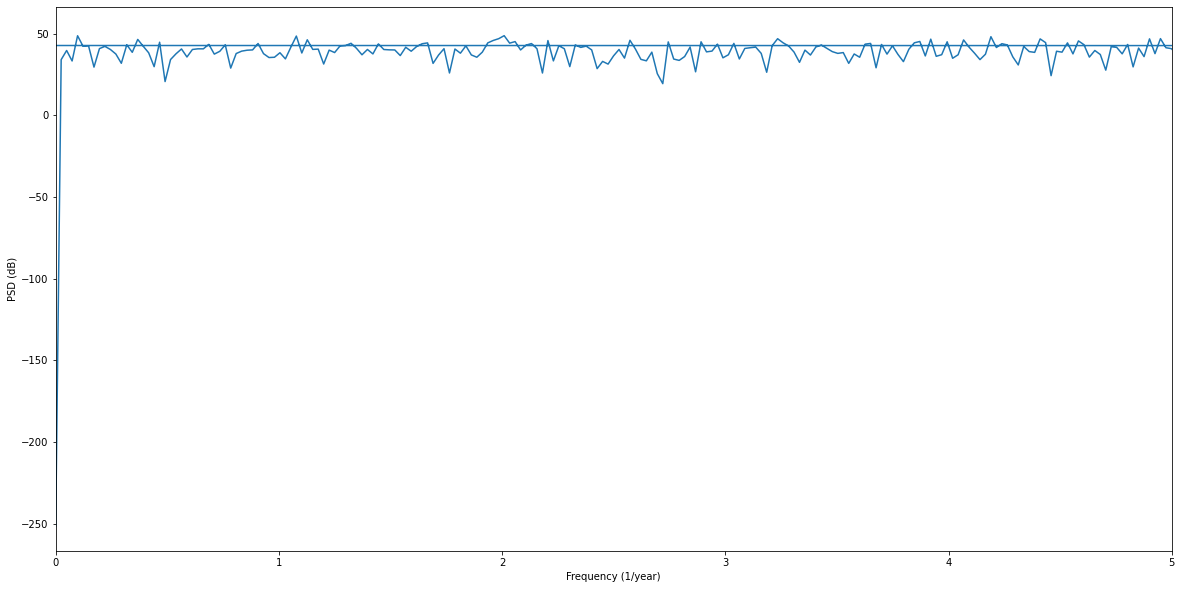

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(stdLogRetRates_fftfreq, 10 * np.log10(stdLogRetRates_psd))
ax.set_xlim(0, 5)
ax.set_xlabel('Frequency (1/year)')
ax.set_ylabel('PSD (dB)')

In [49]:
stdLogRetRates_fft_bis = stdLogRetRates_fft.copy()
stdLogRetRates_fft_bis[np.abs(stdLogRetRates_fftfreq) > 1.1] = 0
stdLogRetRates_fft_bis

array([-2.70006240e-13 -0.j        , -4.18598582e+01+28.91432271j,
       -3.53338127e+01-90.30763192j, ...,  4.61605305e+01 +4.38298036j,
       -3.53338127e+01+90.30763192j, -4.18598582e+01-28.91432271j])

Text(0, 0.5, 'Mean temperature')

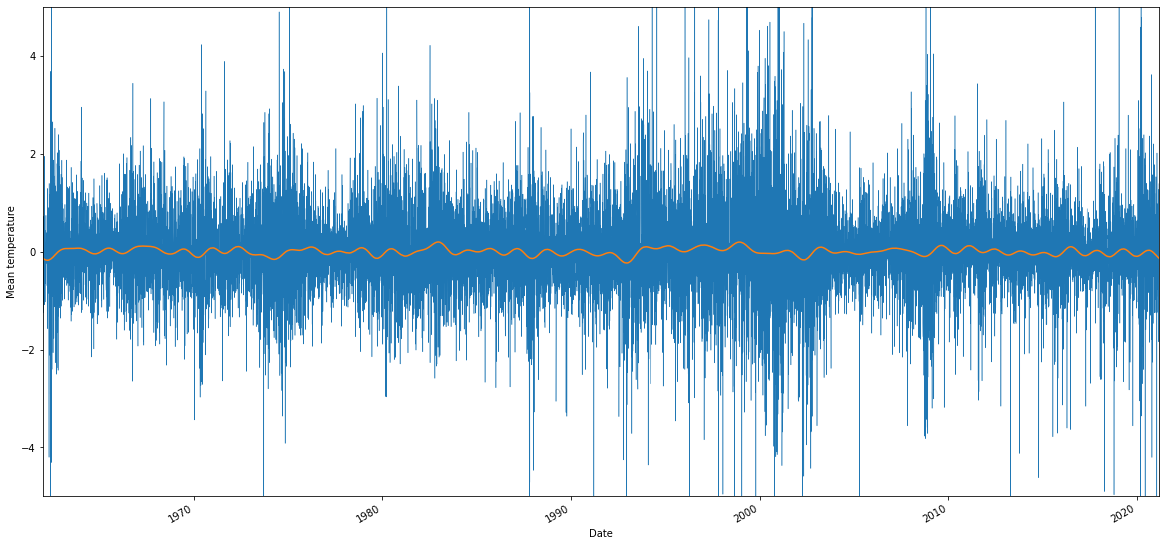

In [50]:
# Inverse FFT to convert the modified Fourier transform back to the temporal domain. 
# Recovered signal that mainly contains the fundamental frequency

stdLogRetRates_slow = np.real(sp.fftpack.ifft(stdLogRetRates_fft_bis))

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
df_avg['StandarizedLogReturnRates'].plot(ax=ax, lw=.5)
ax.plot_date(dates, stdLogRetRates_slow, '-')
ax.set_xlim(datetime_dates[0],
            datetime_dates[len(datetime_dates)-1])
ax.set_ylim(-5, 5)
ax.set_xlabel('Date')
ax.set_ylabel('Mean temperature')


FFT FOR ABSOLUTE VALS

In [51]:
df_avg = white_noise['StandarizedWhiteNoise'].dropna().groupby('Date').mean()
df_avg.head()

Date
1962-01-02    0.922626
1962-01-03   -1.914407
1962-01-04    1.156987
1962-01-05    1.158831
1962-01-08   -0.470362
Name: StandarizedWhiteNoise, dtype: float64

Text(0, 0.5, 'StandarizedWhiteNoise')

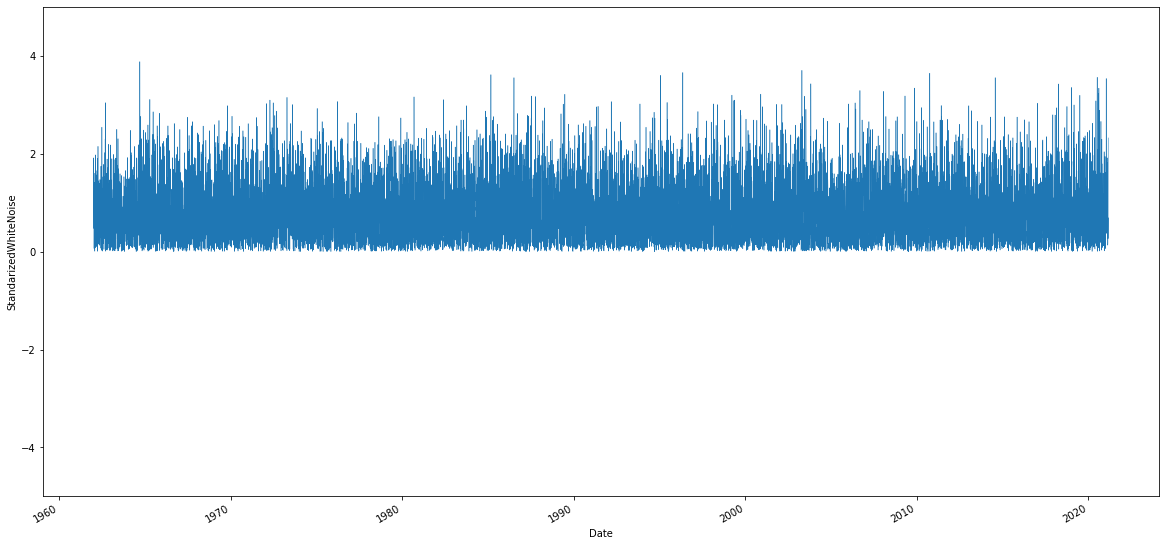

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
(abs(df_avg)).plot(ax=ax, lw=.5)
ax.set_ylim(-5, 5)
ax.set_xlabel('Date')
ax.set_ylabel('StandarizedWhiteNoise')

In [53]:
# Fourier transform
white_noise_fft = sp.fftpack.fft(np.array((abs(df_avg))))
white_noise_fft

array([ 1.18531889e+04  -0.j        ,  2.97462500e+01 -62.86026982j,
        5.04992764e+01  +7.80389682j, ..., -9.46872043e+00+141.3135998j ,
        5.04992764e+01  -7.80389682j,  2.97462500e+01 +62.86026982j])

In [54]:
# power of spectral density (PSD)
white_noise_psd = np.abs(white_noise_fft) ** 2
white_noise_psd

array([1.40498086e+08, 4.83625291e+03, 2.61107772e+03, ...,
       2.00591902e+04, 2.61107772e+03, 4.83625291e+03])

In [55]:
white_noise_fftfreq = sp.fftpack.fftfreq(len(white_noise_psd), 1. / 365)
white_noise_fftfreq

array([ 0.        ,  0.02450322,  0.04900644, ..., -0.07350967,
       -0.04900644, -0.02450322])

Power spectral density of signal plot, as a function of the frequency (in unit of 1/year) in logarithmic scale for the y axis (decibels)

Text(0, 0.5, 'PSD (dB)')

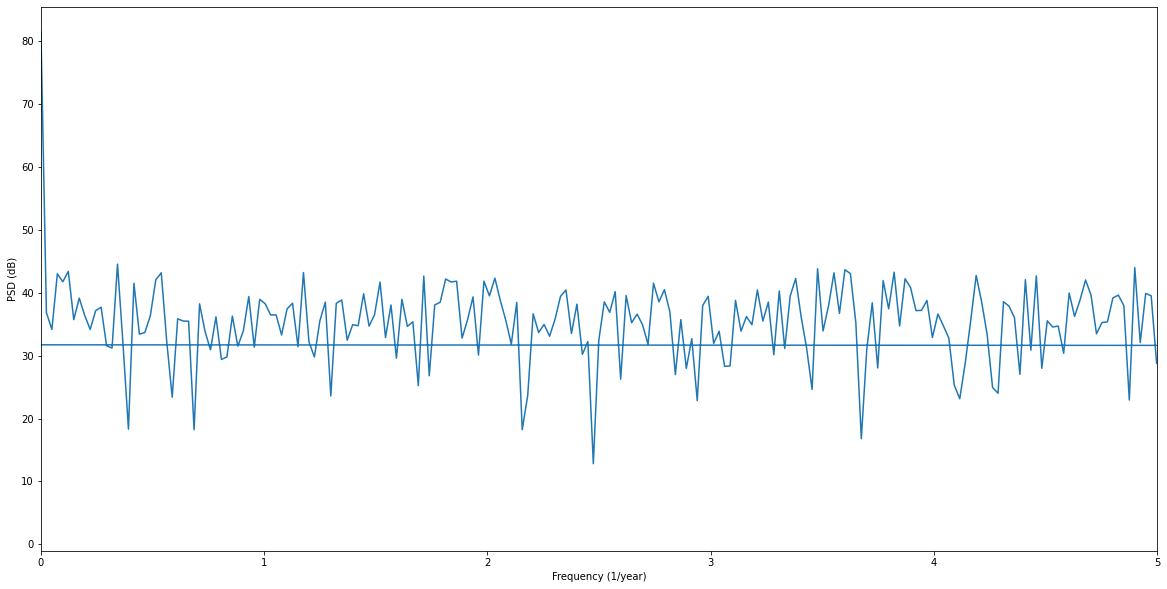

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(white_noise_fftfreq, 10 * np.log10(white_noise_psd))
ax.set_xlim(0, 5)
ax.set_xlabel('Frequency (1/year)')
ax.set_ylabel('PSD (dB)')

In [57]:
white_noise_fft_bis = white_noise_fft.copy()
white_noise_fft_bis[np.abs(white_noise_fftfreq) > 1.1] = 0
white_noise_fft_bis

array([ 1.18531889e+04  -0.j        ,  2.97462500e+01 -62.86026982j,
        5.04992764e+01  +7.80389682j, ..., -9.46872043e+00+141.3135998j ,
        5.04992764e+01  -7.80389682j,  2.97462500e+01 +62.86026982j])

Text(0, 0.5, 'Mean temperature')

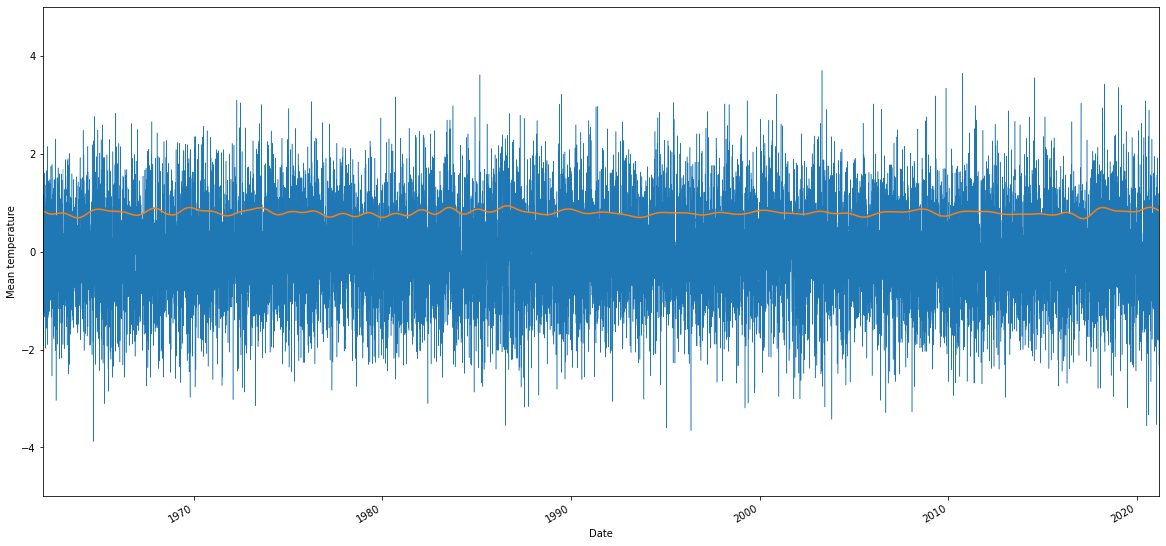

In [58]:
# Inverse FFT to convert the modified Fourier transform back to the temporal domain. 
# Recovered signal that mainly contains the fundamental frequency

white_noise_slow = np.real(sp.fftpack.ifft(white_noise_fft_bis))

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
df_avg.plot(ax=ax, lw=.5)
ax.plot_date(dates, white_noise_slow, '-')
ax.set_xlim(datetime_dates[0],
            datetime_dates[len(datetime_dates)-1])
ax.set_ylim(-5, 5)
ax.set_xlabel('Date')
ax.set_ylabel('Mean temperature')


Log Return Rates

In [59]:
df_avg = close.dropna().groupby('Date').mean()
df_avg.head()

,RawPrice,LogReturnRates,StandarizedLogReturnRates
Date,,,
1962-01-02,7.626667,0.000000,-0.011651
1962-01-03,7.693333,0.008703,0.531862
1962-01-04,7.616667,-0.010015,-0.637102
1962-01-05,7.466667,-0.019890,-1.253790
1962-01-08,7.326667,-0.018928,-1.193704


Text(0, 0.5, 'StandarizedLogReturnRates')

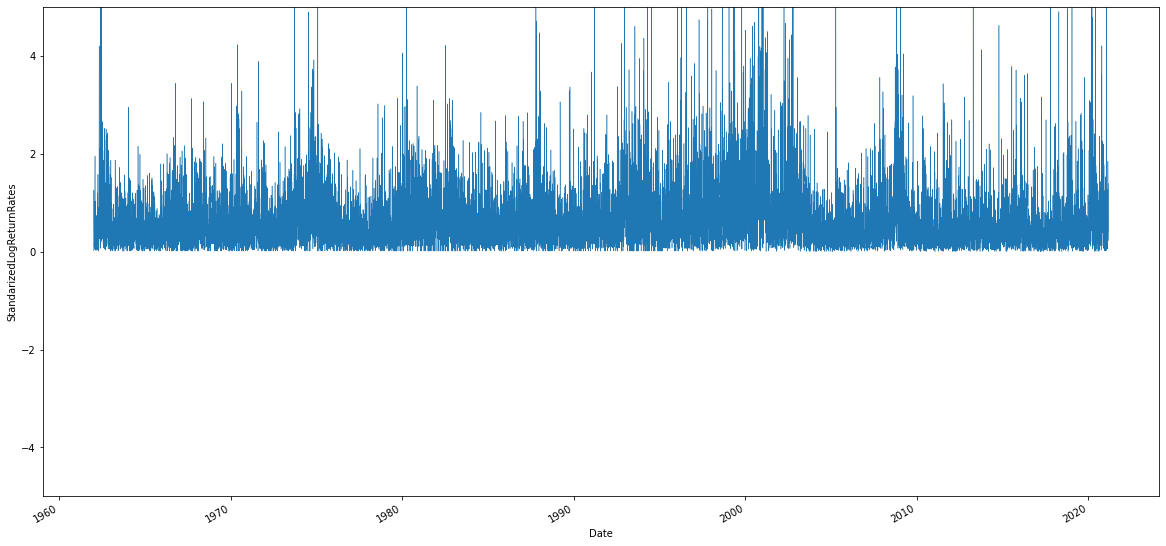

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
abs(df_avg['StandarizedLogReturnRates']).plot(ax=ax, lw=.5)
ax.set_ylim(-5, 5)
ax.set_xlabel('Date')
ax.set_ylabel('StandarizedLogReturnRates')

In [61]:
# Fourier transform
stdLogRetRates_fft = sp.fftpack.fft(np.array(abs(df_avg['StandarizedLogReturnRates'])))
stdLogRetRates_fft

array([ 1.03212334e+04  -0.j        , -7.75397380e+02+527.9661358j ,
       -3.51768510e+00-826.53082757j, ...,  5.66201995e+02-420.21904091j,
       -3.51768510e+00+826.53082757j, -7.75397380e+02-527.9661358j ])

In [62]:
# power of spectral density (PSD)
stdLogRetRates_psd = np.abs(stdLogRetRates_fft) ** 2
stdLogRetRates_psd

array([1.06527859e+08, 8.79989337e+05, 6.83165583e+05, ...,
       4.97168741e+05, 6.83165583e+05, 8.79989337e+05])

In [63]:
stdLogRetRates_fftfreq = sp.fftpack.fftfreq(len(stdLogRetRates_psd), 1. / 365)
stdLogRetRates_fftfreq

array([ 0.        ,  0.02450322,  0.04900644, ..., -0.07350967,
       -0.04900644, -0.02450322])

Power spectral density of signal plot, as a function of the frequency (in unit of 1/year) in logarithmic scale for the y axis (decibels)

Text(0, 0.5, 'PSD (dB)')

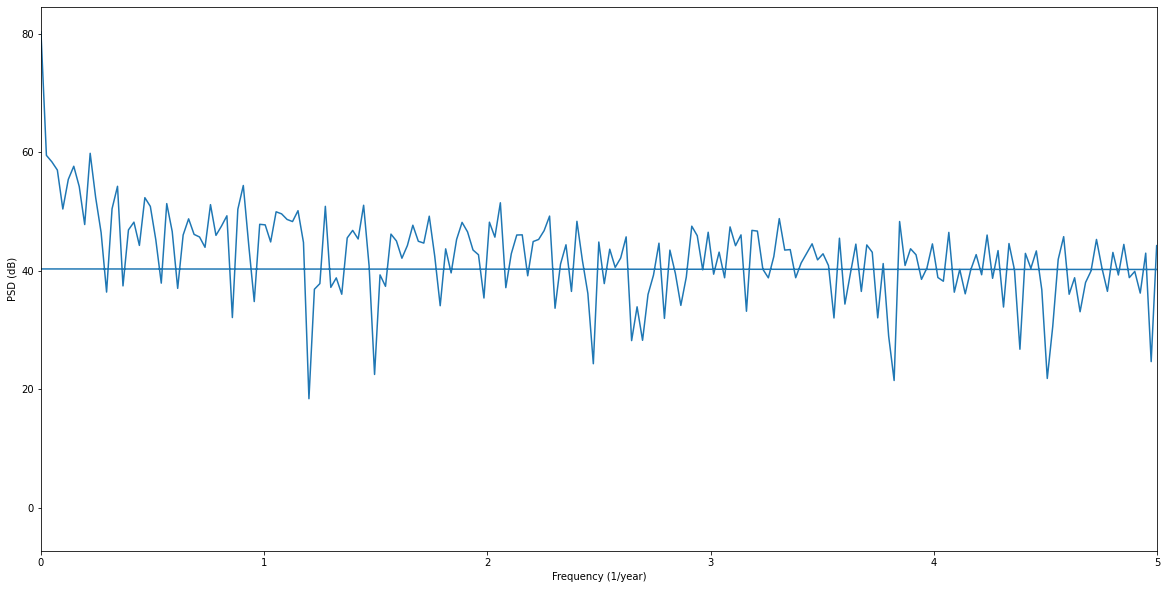

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(stdLogRetRates_fftfreq, 10 * np.log10(stdLogRetRates_psd))
ax.set_xlim(0, 5)
ax.set_xlabel('Frequency (1/year)')
ax.set_ylabel('PSD (dB)')

In [65]:
stdLogRetRates_fft_bis = stdLogRetRates_fft.copy()
stdLogRetRates_fft_bis[np.abs(stdLogRetRates_fftfreq) > 1.1] = 0
stdLogRetRates_fft_bis

array([ 1.03212334e+04  -0.j        , -7.75397380e+02+527.9661358j ,
       -3.51768510e+00-826.53082757j, ...,  5.66201995e+02-420.21904091j,
       -3.51768510e+00+826.53082757j, -7.75397380e+02-527.9661358j ])

Text(0, 0.5, 'Mean temperature')

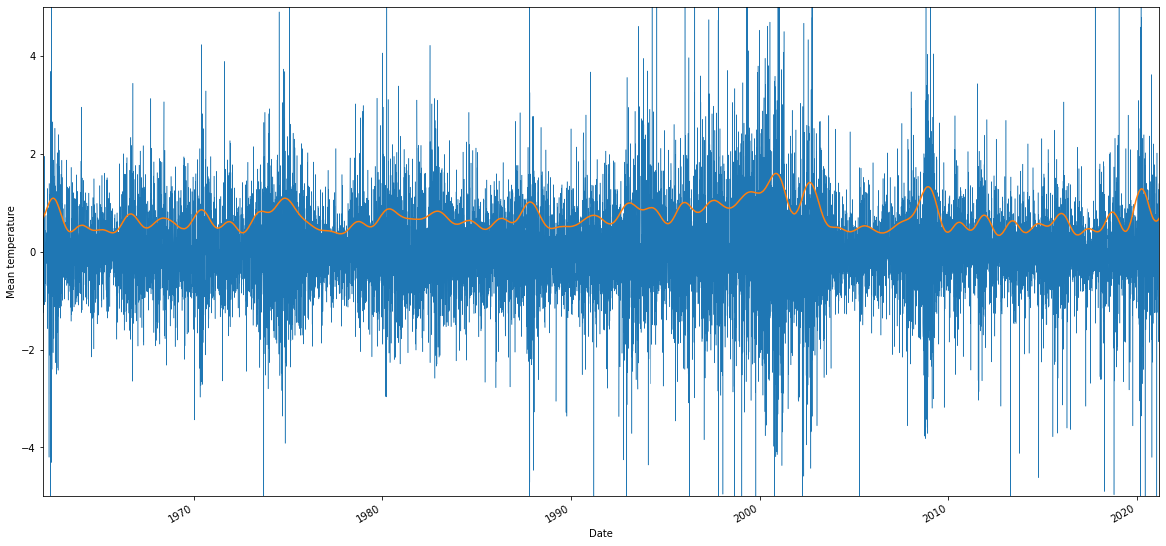

In [66]:
# Inverse FFT to convert the modified Fourier transform back to the temporal domain. 
# Recovered signal that mainly contains the fundamental frequency

stdLogRetRates_slow = np.real(sp.fftpack.ifft(stdLogRetRates_fft_bis))

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
df_avg['StandarizedLogReturnRates'].plot(ax=ax, lw=.5)
ax.plot_date(dates, stdLogRetRates_slow, '-')
ax.set_xlim(datetime_dates[0],
            datetime_dates[len(datetime_dates)-1])
ax.set_ylim(-5, 5)
ax.set_xlabel('Date')
ax.set_ylabel('Mean temperature')
